In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!unzip -d "/content/drive/MyDrive/word_embeddings" "/content/drive/MyDrive/word_embeddings.zip"

In [4]:
#!pip install eli5a

In [5]:
import os 
os.chdir("/content/Hope_speech/Models")

In [26]:
from embeddings_loader import *
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
import pickle
#import eli5

In [7]:
path = "/content/drive/MyDrive/word_embeddings/computed_embeddings"

In [8]:
train_labels, dev_labels, test_labels = load_labels(path)

In [9]:
def computeAllScores(y_pred_train, y_pred_dev, y_pred_test):
    print("Accuracy Train: ", accuracy_score(train_labels, y_pred_train))
    print("Accuracy Dev: ", accuracy_score(dev_labels, y_pred_dev))
    print("Accuracy Test: ", accuracy_score(test_labels, y_pred_test))
    print("F1 Train: ", f1_score(train_labels, y_pred_train, average='weighted'))
    print("F1 Dev: ", f1_score(dev_labels, y_pred_dev, average='weighted'))
    print("F1 Test: ", f1_score(test_labels, y_pred_test, average='weighted'))
    print("Precision Train: ", precision_score(train_labels, y_pred_train, average='weighted'))
    print("Precision Dev: ", precision_score(dev_labels, y_pred_dev, average='weighted'))
    print("Precision Test: ", precision_score(test_labels, y_pred_test, average='weighted'))
    print("Recall Train: ", recall_score(train_labels, y_pred_train, average='weighted'))
    print("Recall Dev: ", recall_score(dev_labels, y_pred_dev, average='weighted'))
    print("Recall Test: ", recall_score(test_labels, y_pred_test, average='weighted'))
    # Confusion Matrix
    print("Confusion Matrix Train: ")
    print(confusion_matrix(train_labels, y_pred_train))
    print("Confusion Matrix Dev: ")
    print(confusion_matrix(dev_labels, y_pred_dev))
    print("Confusion Matrix Test: ")
    print(confusion_matrix(test_labels, y_pred_test))

In [10]:
label_replacement = {
    'Hope_speech': 0,
    'Non_hope_speech': 1,
    'not-English': 2,
}

In [11]:
# Replace labels with numbers
train_labels = [label_replacement[label] for label in train_labels]
dev_labels = [label_replacement[label] for label in dev_labels]
test_labels = [label_replacement[label] for label in test_labels]

In [ ]:
xgb_params = {'base_estimator':[DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=1)],
              'XGB__n_estimators':[100, 200, 300],
              }

### Glove Twitter 25

In [27]:
gt25_train, gt25_dev, gt25_test = load_glove_twitter_25(path)

In [28]:
# Set all NaN values to 0
gt25_train = np.nan_to_num(gt25_train)
gt25_dev = np.nan_to_num(gt25_dev)
gt25_test = np.nan_to_num(gt25_test)

In [29]:
gt25_train.shape

(22762, 25)

In [30]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100)

In [31]:
xgboost.fit(gt25_train, train_labels)

XGBClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
              objective='multi:softprob')

In [32]:
#print(f"Best parameters: {xgboost.best_parms_}")

In [33]:
train_preds = xgboost.predict(gt25_train)
dev_preds = xgboost.predict(gt25_dev)
test_preds = xgboost.predict(gt25_test)

In [34]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9154292241455056
Accuracy Dev:  0.9050298979950756
Accuracy Test:  0.9139142656359803
F1 Train:  0.8782036493504524
F1 Dev:  0.8632082668166939
F1 Test:  0.8766774066919817
Precision Train:  0.91144137571836
Precision Dev:  0.8854312503794596
Precision Test:  0.9061833328291322
Recall Train:  0.9154292241455056
Recall Dev:  0.9050298979950756
Recall Test:  0.9139142656359803
Confusion Matrix Train: 
[[   65  1897     0]
 [   10 20768     0]
 [    0    18     4]]
Confusion Matrix Dev: 
[[   7  265    0]
 [   3 2566    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  10  240    0]
 [   2 2591    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
filename = 'xgb_gt25.sav'
pickle.dump(xgboost, open(filename, 'wb'))

### FastText 300 

In [36]:
ft300_train, ft300_dev, ft300_test = load_fasttext_300(path)

In [37]:
# Set all NaN values to 0
ft300_train = np.nan_to_num(ft300_train)
ft300_dev = np.nan_to_num(ft300_dev)
ft300_test = np.nan_to_num(ft300_test)

In [38]:
ft300_train.shape

(22762, 300)

In [39]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100)

In [40]:
xgboost.fit(ft300_train, train_labels)

XGBClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
              objective='multi:softprob')

In [41]:
#print(f"Best parameters: {xgboost.best_parms_}")

In [42]:
train_preds = xgboost.predict(ft300_train)
dev_preds = xgboost.predict(ft300_dev)
test_preds = xgboost.predict(ft300_test)

In [43]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9204815042614884
Accuracy Dev:  0.9099542736545903
Accuracy Test:  0.9191848208011244
F1 Train:  0.8905398838731728
F1 Dev:  0.8763610492167104
F1 Test:  0.8882391584663895
Precision Train:  0.9169831181023383
Precision Dev:  0.8983244809941547
Precision Test:  0.918749228306003
Recall Train:  0.9204815042614884
Recall Dev:  0.9099542736545903
Recall Test:  0.9191848208011244
Confusion Matrix Train: 
[[  195  1767     0]
 [   28 20750     0]
 [    0    15     7]]
Confusion Matrix Dev: 
[[  25  247    0]
 [   7 2562    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  25  225    0]
 [   2 2591    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
filename = 'xgb_ft300.sav'
pickle.dump(xgboost, open(filename, 'wb'))

### Word2Vec 300

In [45]:
w2v300_train, w2v300_dev, w2v300_test = load_word2vec_300(path)

In [46]:
# Set all NaN values to 0
w2v300_train = np.nan_to_num(w2v300_train)
w2v300_dev = np.nan_to_num(w2v300_dev)
w2v300_test = np.nan_to_num(w2v300_test)

In [47]:
w2v300_train.shape

(22762, 300)

In [48]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators= 100).fit(w2v300_train, train_labels)

In [49]:
train_preds = xgboost.predict(w2v300_train)
dev_preds = xgboost.predict(w2v300_dev)
test_preds = xgboost.predict(w2v300_test)

In [50]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9238204024250944
Accuracy Dev:  0.911712979247274
Accuracy Test:  0.9198875614898102
F1 Train:  0.8974112614434939
F1 Dev:  0.8804833273147293
F1 Test:  0.8925433045364431
Precision Train:  0.9223808909088795
Precision Dev:  0.901361476405394
Precision Test:  0.910346789590834
Recall Train:  0.9238204024250944
Recall Dev:  0.911712979247274
Recall Test:  0.9198875614898102
Confusion Matrix Train: 
[[  272  1690     0]
 [   29 20749     0]
 [    0    15     7]]
Confusion Matrix Dev: 
[[  31  241    0]
 [   8 2561    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  33  217    0]
 [   8 2585    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
filename = 'xgboost_w2v300.sav'
pickle.dump(xgboost, open(filename, 'wb'))

### TF-IDF PCA (1000 Dims)

In [52]:
tfidf_pca_train, tfidf_pca_dev, tfidf_pca_test = load_tfidf_pca(path)

In [53]:
tfidf_pca_train.shape

(22762, 1000)

In [54]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100).fit(tfidf_pca_train, train_labels)

In [55]:
features = np.array([f"pc{i}" for i in range(1, 1001)])

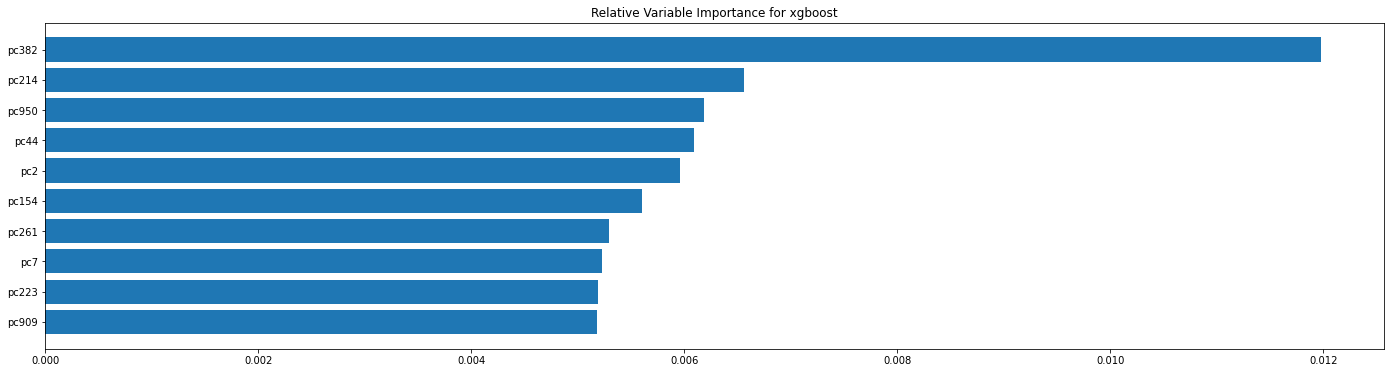

In [56]:
X = features[np.flip(np.argsort(xgboost.feature_importances_))]
fig, axs = plt.subplots(1,1, figsize=(24,6))
models = {'xgboost': xgboost} 
num_features = 10 
for i, (name, model) in enumerate(models.items()):
    importances = model.feature_importances_
    order = np.argsort(importances)[-num_features:]
    axs.barh(range(num_features), importances[order], tick_label=X[order]);
    axs.set_title(f"Relative Variable Importance for {name}")

In [57]:
train_preds = xgboost.predict(tfidf_pca_train)
dev_preds = xgboost.predict(tfidf_pca_dev)
test_preds = xgboost.predict(tfidf_pca_test)

In [58]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9280818908707495
Accuracy Dev:  0.9124164614843475
Accuracy Test:  0.9184820801124385
F1 Train:  0.9060108585701726
F1 Dev:  0.885451428459066
F1 Test:  0.8906607049206272
Precision Train:  0.9269953359358324
Precision Dev:  0.8968685768600237
Precision Test:  0.9054121573680854
Recall Train:  0.9280818908707495
Recall Dev:  0.9124164614843475
Recall Test:  0.9184820801124385
Confusion Matrix Train: 
[[  381  1581     0]
 [   37 20741     0]
 [    0    19     3]]
Confusion Matrix Dev: 
[[  41  231    0]
 [  16 2553    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  31  219    0]
 [  10 2583    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
filename = 'xgb_tfidf_pca.sav'
pickle.dump(xgboost, open(filename, 'wb'))

### Sentence Transformer Faster No PCA

In [60]:
train, dev, test = load_sent_trans_fast_no_pca(path)

In [61]:
train.shape

(22762, 384)

In [62]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2)).fit(train, train_labels)

In [63]:
train_preds = xgboost.predict(train)
dev_preds = xgboost.predict(dev)
test_preds = xgboost.predict(test)

In [64]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9340567612687813
Accuracy Dev:  0.9166373549067885
Accuracy Test:  0.9262122276879832
F1 Train:  0.9202107350445063
F1 Dev:  0.8983862317741971
F1 Test:  0.9089308225473208
Precision Train:  0.9277085640995333
Precision Dev:  0.9015005409533323
Precision Test:  0.9148754305029703
Recall Train:  0.9340567612687813
Recall Dev:  0.9166373549067885
Recall Test:  0.9262122276879832
Confusion Matrix Train: 
[[  612  1350     0]
 [  136 20642     0]
 [    0    15     7]]
Confusion Matrix Dev: 
[[  68  204    0]
 [  31 2538    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  64  186    0]
 [  21 2572    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
filename = 'sent_t_no_pca_fast.sav'
pickle.dump(xgboost, open(filename, 'wb'))

### Sentence Transformer Faster PCA

In [66]:
train, dev, test = load_sent_trans_fast_pca(path)

In [67]:
train.shape

(22762, 251)

In [68]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100).fit(train, train_labels)

In [69]:
train_preds = xgboost.predict(train)
dev_preds = xgboost.predict(dev)
test_preds = xgboost.predict(test)

In [70]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9324751779281258
Accuracy Dev:  0.9173408371438622
Accuracy Test:  0.9241040056219255
F1 Train:  0.9166536026674365
F1 Dev:  0.8966540439123507
F1 Test:  0.906654218674825
Precision Train:  0.9268464472420087
Precision Dev:  0.9042011367742299
Precision Test:  0.9106299242486156
Recall Train:  0.9324751779281258
Recall Dev:  0.9173408371438622
Recall Test:  0.9241040056219255
Confusion Matrix Train: 
[[  551  1411     0]
 [  108 20670     0]
 [    0    18     4]]
Confusion Matrix Dev: 
[[  61  211    0]
 [  22 2547    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  62  188    0]
 [  25 2568    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
filename = 'sent_t_pca_fast.sav'
pickle.dump(xgboost, open(filename, 'wb'))

### Sentence Transformer Better No PCA

In [72]:
train, dev, test = load_sent_trans_better_no_pca(path)

In [73]:
train.shape

(22762, 768)

In [74]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100).fit(train, train_labels)

In [75]:
train_preds = xgboost.predict(train)
dev_preds = xgboost.predict(dev)
test_preds = xgboost.predict(test)

In [76]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9397680344433705
Accuracy Dev:  0.9250791417516707
Accuracy Test:  0.9297259311314126
F1 Train:  0.9294138800877898
F1 Dev:  0.9120426263931851
F1 Test:  0.9182740387185443
Precision Train:  0.9346901121354545
Precision Dev:  0.914629043049334
Precision Test:  0.9187417883997595
Recall Train:  0.9397680344433705
Recall Dev:  0.9250791417516707
Recall Test:  0.9297259311314126
Confusion Matrix Train: 
[[  757  1205     0]
 [  151 20627     0]
 [    0    15     7]]
Confusion Matrix Dev: 
[[  93  179    0]
 [  32 2537    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  88  162    0]
 [  35 2558    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
filename = 'sent_t_n0_pca_better.sav'
pickle.dump(xgboost, open(filename, 'wb'))

### Sentence Transformer Better PCA

In [78]:
train, dev, test = load_sent_trans_better_pca(path)

In [79]:
xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100)

In [80]:
"""
skf = StratifiedKFold(n_splits=2, shuffle = True)
skf.get_n_splits(train, train_labels)
train_labels = np.array(train_labels)
print(skf)
sum = 0
for train_index, test_index in skf.split(train, train_labels):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = train[train_index], train[test_index]
  y_train, y_test = train_labels[train_index], train_labels[test_index]
  xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100)
  xgboost.fit(X_train, y_train)
  train_preds = xgboost.predict(X_train)
  dev_preds = xgboost.predict(dev)
  test_preds = xgboost.predict(X_test)
  computeAllScores(y_train, y_test, train_preds, dev_preds, test_preds)
  sum += xgboost.score(X_test, y_test)
"""

'\nskf = StratifiedKFold(n_splits=2, shuffle = True)\nskf.get_n_splits(train, train_labels)\ntrain_labels = np.array(train_labels)\nprint(skf)\nsum = 0\nfor train_index, test_index in skf.split(train, train_labels):\n  print("TRAIN:", train_index, "TEST:", test_index)\n  X_train, X_test = train[train_index], train[test_index]\n  y_train, y_test = train_labels[train_index], train_labels[test_index]\n  xgboost = XGBClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = 100)\n  xgboost.fit(X_train, y_train)\n  train_preds = xgboost.predict(X_train)\n  dev_preds = xgboost.predict(dev)\n  test_preds = xgboost.predict(X_test)\n  computeAllScores(y_train, y_test, train_preds, dev_preds, test_preds)\n  sum += xgboost.score(X_test, y_test)\n'

In [ ]:
#xgboost = GridSearchCV(XGBClassifier(), xgb_params, n_jobs=-1, cv=5)

In [ ]:
#xgboost.fit(train, train_labels)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'XGB__n_estimators': [100, 200, 300],
                         'base_estimator': [DecisionTreeClassifier(max_depth=2),
                                            DecisionTreeClassifier(max_depth=1)]})

In [ ]:
print(f"Best parameters: {xgboost.best_params_}")

Best parameters: {'XGB__n_estimators': 100, 'base_estimator': DecisionTreeClassifier(max_depth=2)}


In [81]:
xgboost.fit(train, train_labels)

XGBClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
              objective='multi:softprob')

In [82]:
train_preds = xgboost.predict(train)
dev_preds = xgboost.predict(dev)
test_preds = xgboost.predict(test)

In [83]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9361655390563219
Accuracy Dev:  0.9212099894477664
Accuracy Test:  0.9311314125087843
F1 Train:  0.9223368634540978
F1 Dev:  0.9040964101490095
F1 Test:  0.9163887500442911
Precision Train:  0.9320676138954185
Precision Dev:  0.9098218097189547
Precision Test:  0.9227567666571385
Recall Train:  0.9361655390563219
Recall Dev:  0.9212099894477664
Recall Test:  0.9311314125087843
Confusion Matrix Train: 
[[  622  1340     0]
 [   99 20679     0]
 [    0    14     8]]
Confusion Matrix Dev: 
[[  75  197    0]
 [  25 2544    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  76  174    0]
 [  19 2574    0]
 [   0    3    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
filename = 'sent_t_pca_better.sav'
pickle.dump(xgboost, open(filename, 'wb'))

In [85]:
!mkdir "/content/drive/MyDrive/XGB_models"

In [87]:
!mv xgb_ft300.sav "/content/drive/MyDrive/XGB_models"

In [88]:
!mv xgb_gt25.sav "/content/drive/MyDrive/XGB_models"

In [89]:
!mv xgb_sent_t_no_pca_better.sav "/content/drive/MyDrive/XGB_models"

In [90]:
!mv xgb_sent_t_pca_better.sav "/content/drive/MyDrive/XGB_models"

In [91]:
!mv xgb_sent_t_no_pca_fast.sav "/content/drive/MyDrive/XGB_models"

In [92]:
!mv xgb_sent_t_pca_fast.sav "/content/drive/MyDrive/XGB_models"

In [93]:
!mv xgb_tfidf_pca.sav "/content/drive/MyDrive/XGB_models"

In [94]:
!mv xgboost_w2v300.sav "/content/drive/MyDrive/XGB_models"